## Milestone 1: Problem Definition, Dataset Selection, and Data Exploration

LIS 640 - Introduction to Applied Deep Learning

Due 2/14/25

## **Overview**
In this milestone, you will:
1. **Define a deep learning problem** where AI can make a meaningful impact.
2. **Identify three datasets** that fit your topic and justify their relevance.
3. **Explore and visualize** the datasets to understand their structure.
4. **Implement a PyTorch Dataset class** to prepare data for deep learning.

This notebook provides an example of **fuel-efficient car usage** to illustrate what is expected.


## **Step 1: Define Your Deep Learning Problem**
Write a paragraph explaining:
- **Why your chosen topic is important.**
- **How deep learning can help solve the problem.**

### **Example Problem Statement: Fuel-Efficient Car Usage**
*Fuel efficiency is a major factor in reducing carbon emissions and lowering fuel costs. Drivers often adopt inefficient driving patterns, wasting fuel through unnecessary acceleration, braking, or idling. A deep learning model could analyze driving behavior and suggest optimizations in real-time, helping individuals improve their fuel economy.*

➡ **Write your problem statement below:**  

### **Lane Line Detection**
Lane line detection is a crucial aspect of most autonomous driving systems. It involves identifying and tracking the lane markings on the road to ensure the vehicle stays within its designated lane. Accurate lane detection is essential for maintaining safe driving conditions, enabling features like lane-keeping assistance, adaptive cruise control, and autonomous navigation. However, challenges such as varying lighting conditions, occlusions (e.g., by other vehicles or debris), and poorly marked or faded lane lines can make this task complex. A deep learning model trained on annotated road images can be used to detect lane lines in real-time, providing the vehicle with the necessary information to make informed decisions and navigate safely. By improving the robustness and accuracy of lane detection systems, we can enhance the safety and reliability of autonomous vehicles, ultimately contributing to safer roads and more efficient transportation systems.

## **Step 2: Identify and Justify Three Relevant Datasets**
Find three datasets that provide useful information for solving your problem.  
For each dataset, include:
1. A **short description** of what it contains.
2. A **link to the dataset**.
3. **Why this dataset is useful for your problem.**

### **Example Datasets for Fuel Efficiency**

- **Dataset 1: Vehicle Trajectory Data (NGSIM US 101 Dataset)**
	- Description: This dataset contains detailed vehicle trajectory data collected on a segment of the U.S. Highway 101 in Los Angeles, California. It includes precise location information of each vehicle within the study area every one-tenth of a second, capturing detailed lane-changing and car-following behaviors.
	- Source: [U.S. Department of Transportation - NGSIM Program](https://data.transportation.gov/stories/s/Next-Generation-Simulation-NGSIM-Open-Data/i5zb-xe34/)
	- Justification: Analyzing this data can help identify driving patterns that affect fuel efficiency, such as frequent lane changes or abrupt braking.

- **Dataset 2: Climate & Air Quality Data**  
  - Description: Contains CO2 emissions and climate-related metrics across different regions.
	•	Source: [U.S. Historical Climatology Network](https://www.ncei.noaa.gov/products/land-based-station/us-historical-climatology-network)
	•	Justification: Can correlate driving behavior with environmental impact. Provides environmental context to fuel consumption.

- **Dataset 3: Automobile Dataset (UCI Machine Learning Repository)**
  - Description: This dataset includes various characteristics of automobiles, such as engine size, horsepower, weight, and fuel consumption. It also provides information on insurance risk ratings and normalized losses in use as compared to other cars.
  - Source: [UCI Machine Learning Repository - Automobile Dataset](https://archive.ics.uci.edu/dataset/10/automobile)
  - Justification: The dataset’s detailed vehicle specifications and performance metrics can be used to analyze how different factors influence fuel efficiency, aiding in the development of predictive models.

➡ **Find and document three datasets for your problem below:**

- **Dataset 1: Lane Line detection Dataset**
	- Description: This dataset has 100 images from German roads including annotated lane lines in each image. The dataset is diverse including curved roads.
	- Source: [New-Lane detection Computer Vision](https://universe.roboflow.com/maanasa-prasad/new-lane-detection)
	- Justification: Provides lane line data from different environments and includes curved lane lines.

- **Dataset 2: Indian Roads Dataset**
	- Description: This dataset contains over 650 labeled lane images of various road environments, such as curves, traffic, and more. It is collected from real scenarios across multiple cities in India, and includes images with lane lines that are manually annotated with polygons.
	- Source: [Lane Detection Computer Vision Project](https://universe.roboflow.com/autonomous-umjvo/lane-detection-2-qpx6p)
	- Justification: Provides lane line data from a different road driving setting, allowing us to get a better variety of data (i.e. left/right hand drive, different road markings, etc).

- **Dataset 3: US Roads Dataset**
	- Description: This dataset contains over 100 labeled lane images from highway driving in the United States in clear conditions. It includes images with the relevant lanes and lane lines annotated with polygons.
	- Source: [Lane Detection Computer Vision Group](https://universe.roboflow.com/computer-vision-controls-research-group/lane-detection-tjaa0)
	- Justification: Provides lane line data from a more local and potentially more relevant setting where lane line detection might be more necessary – ADAS/hands-off cruise control and steering for long highway drives.



### We also found these datasets, but have not analyzed them yet due to the size and might explore them later if possible
- **Dataset 1: CurveLanes Dataset from Kaggle**
	- Description: This dataset has 150k lane images of difficult scenarios such as curves and multi-lanes in traffic. It is collected from real urban and highway scenarios in multiple cities in China. The dataset includes images with lane lines which are manually annotated with natural cubic splines. The labels include two key x, y coordinates of the lane marking.
	- Source: [Kaggle CurveLanes Dataset](https://www.kaggle.com/datasets/bnyadmohammed/curvelanes/data) and uploaded from [Github CurveLanes Dataset](https://github.com/SoulmateB/CurveLanes)
	- Justification: The dataset includes more difficult to detect lane lines in more complex and variety of scenarios

- **Dataset 2: Waymo Open Dataset - Motion Dataset**
	- Description: This dataset has lane line data which was used internally by Waymo for their training purposes which has been open sourced. It includes lane connections, lane boundaries and lane neighbors. It provies information of multiple x, y coordinates along the lane line as labels.
	- Source [Waymo Open Dataset](https://github.com/waymo-research/waymo-open-dataset?tab=readme-ov-file)
	- Justification: This data includes detailed information on more lane line data but also includes features such as lane neighbors and lane connections.

- **Dataset 3: TuSimple Lane Line Dataset**
	- Description: The dataset consists of 6,408 road images on US highways and includes images from different weather conditions. Dataset includes annotated lane lines.
	- Source [TuSimple Dataset on Kaggle](https://www.kaggle.com/datasets/manideep1108/tusimple)
	- Justification: This dataset emphasizes variation in weather conditions which the other datasets do not mention which will allow our model to generalize better.


## **Step 3: Explore and Visualize Your Data**
Understanding the structure of your dataset is crucial. Perform the following tasks:
1. **Summarize dataset statistics:**
   - Number of samples
   - Number of features
   - Data types (numerical, categorical, text, etc.)
   - Ranges of values (min/max)
   - Missing values

2. **Create visualizations:**
   - Histograms: Show feature distributions.
   - Scatter plots: Explore relationships between key variables.
   - (Optional) PCA: Visualize high-dimensional data in 2D.

### **Example Exploration Code**
Modify this code to work with your dataset.


In [97]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random

datasets = {
    "German": {
        "image_dir": "../Maanasa/train/images",
        "label_dir": "../Maanasa/train/labels"
    },
    "Indian": {
        "image_dir": "../Autonomous/train/images",
        "label_dir": "../Autonomous/train/labels"
    },
    "US": {
        "image_dir": "../ComputerVisionGroup/train/images",
        "label_dir": "../ComputerVisionGroup/train/labels"
    }
}

total_images = 0
total_labels = 0
all_dims = []

for name, paths in datasets.items():
    image_dir = paths["image_dir"]
    label_dir = paths["label_dir"]

    image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))]
    label_files = [f for f in os.listdir(label_dir) if f.endswith('.txt')]

    total_images += len(image_files)
    total_labels += len(label_files)

    print(f"{name} Dataset:")
    print(f"  Total images: {len(image_files)}")
    print(f"  Total label files: {len(label_files)}")


German Dataset:
  Total images: 69
  Total label files: 69
Indian Dataset:
  Total images: 565
  Total label files: 565
US Dataset:
  Total images: 96
  Total label files: 96


This gives us an understanding of how much data we have for each dataset. If the datasets have certain trends, we see that the Indian roads dataset is the primary source of data, meaning that our model may be more heavily suited for inference in those conditions. This suggests that we may need to find more data, such as the large datasets we listed above (Waymo, TuSimple, Kaggle curvelines), and incorperate those into our combined dataset in addition to these, to get more accuracy for all different conditions the vehicle may be in.

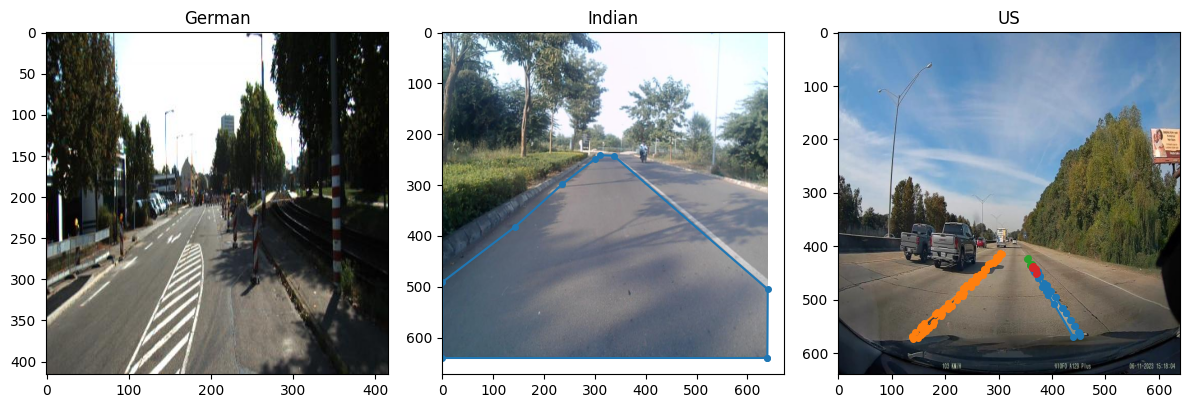

In [98]:
def plot_lane_points(ax, image_path, label_path):
    """Plot lane lines on an image using the given axes."""
    img = Image.open(image_path)
    img = np.array(img)

    lanes = []
    with open(label_path, "r") as f:
        for line in f:
            parts = list(map(float, line.strip().split()))
            if len(parts) < 3:
                continue
            points = np.array(parts[1:]).reshape(-1, 2)
            lanes.append(points)

    ax.imshow(img)
    for lane in lanes:
        ax.plot(lane[:, 0] * img.shape[1], lane[:, 1] * img.shape[0], 
                 marker='o', linestyle='-', markersize=4, label="Lane")

fig, axes = plt.subplots(1, 3, figsize=(12, 5))

for i, (name, dataset) in enumerate(datasets.items()):
    image_dir = dataset["image_dir"]
    label_dir = dataset["label_dir"]
    image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))]
    random_file = random.choice(image_files)
    label_file = random_file.replace('.jpg', '.txt').replace('.png', '.txt')
    plot_lane_points(axes[i], os.path.join(image_dir, random_file), os.path.join(label_dir, label_file))
    axes[i].set_title(name)

plt.tight_layout()
plt.show()


This visualization gives us a visual understanding of the labels for all of our datasets. We see that the Indian roads data set seems to use a different format for its labels, as it uses one big polygon for the area inside the lane lines, while the other two use polygons for each lane line and lane line segment. This may cause issues when we train our model, and we may need to reconfigure the Indian roads labels.

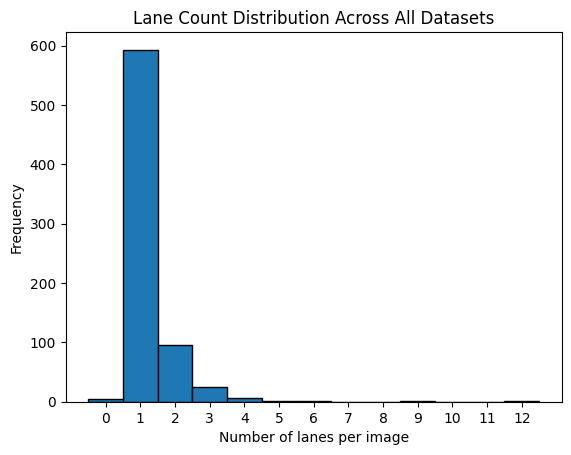

In [99]:
all_lane_counts = []

for name, paths in datasets.items():
    label_dir = paths["label_dir"]
    label_files = [f for f in os.listdir(label_dir) if f.endswith('.txt')]

    lane_counts = []
    for label_file in label_files:
        with open(os.path.join(label_dir, label_file), "r") as f:
            lane_counts.append(len(f.readlines()))

    all_lane_counts.extend(lane_counts)

min_value = min(all_lane_counts)
max_value = max(all_lane_counts)

bins = np.arange(min_value, max_value + 2) - 0.5

plt.hist(all_lane_counts, bins=bins, edgecolor="black", align="mid")
plt.xlabel("Number of lanes per image")
plt.ylabel("Frequency")
plt.title("Lane Count Distribution Across All Datasets")
plt.xticks(np.arange(min_value, max_value + 1))
plt.show()

This gives us an understanding of how many lanes each image has, and we see that predominantly it is one lane per image and this reflects well on our goal as we are trying to develop a model for lane keeping assistance, and thus focusing on the lane that we are in is more important that picking up lanes next to the current one or in opposing directions.

## **Step 4: Implement a PyTorch Dataset Class**
Follow [this tutorial](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) to prepare data for deep learning by creating a PyTorch Dataset class that:
- Loads data from a CSV or another source.
- Applies preprocessing (e.g., normalization, missing value handling).
- Returns samples in a PyTorch-compatible format.

### **Example PyTorch Dataset Implementation**
Modify this template for your dataset.


In [100]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import numpy as np
from torchvision import transforms

class LaneDataset(Dataset):
    def __init__(self, image_dir, label_dir, transform=None):
        """
        Args:
            image_dir (str): Path to the directory with images.
            label_dir (str): Path to the directory with lane line annotations.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.image_dir = image_dir
        self.label_dir = label_dir
        self.transform = transform

        image_filenames = {f.split('.')[0]: f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))}
        label_filenames = {f.split('.')[0]: f for f in os.listdir(label_dir) if f.endswith('.txt')}
        self.filenames = sorted(image_filenames.keys() & label_filenames.keys())

        self.image_files = [image_filenames[f] for f in self.filenames]
        self.label_files = [label_filenames[f] for f in self.filenames]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_files[idx])
        image = Image.open(img_path).convert("RGB")

        label_path = os.path.join(self.label_dir, self.label_files[idx])
        lanes = []
        with open(label_path, "r") as f:
            for line in f:
                parts = list(map(float, line.strip().split()))
                if len(parts) < 3:
                    continue
                class_id = int(parts[0])
                points = parts[1:]
                lanes.append((class_id, torch.tensor(points).view(-1, 2)))
        if self.transform:
            image = self.transform(image)

        return image, lanes

transform = transforms.Compose([
    transforms.Resize((360, 640)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

# German roads dataset
german_dataset = LaneDataset(
    image_dir="../Maanasa/train/images",
    label_dir="../Maanasa/train/labels",
    transform=transform
)

# Indian roads dataset
indian_dataset = LaneDataset(
    image_dir="../Autonomous/train/images",
    label_dir="../Autonomous/train/labels",
    transform=transform
)

# US roads dataset
us_dataset = LaneDataset(
    image_dir="../ComputerVisionGroup/train/images",
    label_dir="../ComputerVisionGroup/train/labels",
    transform=transform
)

print(len(german_dataset))
print(len(indian_dataset))
print(len(us_dataset))


69
530
96


## **Final Submission**
Upload your submission for Milestone 1 to Canvas. 
Submit this notebook with:

✅ A **clear problem statement**.  
✅ Three **documented datasets** with justification.  
✅ **Exploratory analysis** with summary statistics & visualizations.  
✅ A **PyTorch Dataset class** for preparing data.  

📌 Use the provided example to guide your work. Happy Deep Learning! 🚀